In [1]:
!pip install chembl_webresource_client

In [2]:
import pandas as pd

In [2]:
from chembl_webresource_client.new_client import new_client

# chembl database contains bioactivity data of more than 2million compounds,( we're using real-life data here)

# Searching for acetylcholinesterase in the Chembl database

In [3]:
target = new_client.target
target_query = target.search("acetylcholinesterase")
# we send a query for this enzyme and make a dataframe of the retirved data
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Electrophorus electricus,Acetylcholinesterase,16.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
6,[],Bos taurus,Acetylcholinesterase,16.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
7,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
8,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
9,[],Nephotettix cincticeps,Ace-orthologous acetylcholinesterase,16.0,False,CHEMBL2366514,"[{'accession': 'Q9NJH6', 'component_descriptio...",SINGLE PROTEIN,94400


# Selecting and retrieving bioactivity data for Human Acetylcholinesterase 

we take bioactivity data for only the 2nd entry, thats for the enzyme in humans (single protein)


In [6]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL220'

In [7]:

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")


In [ ]:
df = pd.DataFrame(res)

In [7]:
df.standard_type.unique()

NameError: name 'df' is not defined

In [80]:
# standard value is also a column, the higher the value less potenacy, less value high potency

In [3]:
df = pd.read_csv("acetylcholinesterase_01_bioactivity_data_raw.csv")

# Handling missing Data

In [4]:

df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/var/folders/49/q7tf16b54hncs5jk8jk9kdcm0000gn/T/ipykernel_4507/3421966703.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,46.00
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.71
9413,NaN,NaN,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.00


In [5]:
df2.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80


In [6]:
bioactivity_class = []
for i in df2.standard_value:
    if float(i)>=10000:
        bioactivity_class.append("inactive")
    elif float(i)<= 1000:
        bioactivity_class.append("active")
    else :
        bioactivity_class.append("intermediate")

In [7]:
df2.molecule_chembl_id

0        CHEMBL133897
1        CHEMBL336398
2        CHEMBL131588
3        CHEMBL130628
4        CHEMBL130478
            ...      
9410    CHEMBL5398421
9411      CHEMBL11298
9412    CHEMBL5395312
9413    CHEMBL5399112
9414    CHEMBL5402411
Name: molecule_chembl_id, Length: 8128, dtype: object

In [8]:
# it is given a unique id to every molecule, that has a specific effect

In [9]:
selection = ["molecule_chembl_id", "canonical_smiles","standard_value"]
df3 = df2[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0


In [10]:
df3= pd.concat([df3 , pd.Series(bioactivity_class, name='class')], axis=1)
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


In [11]:
df3 =df3.rename(columns={0:"bioactivity"})

In [12]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


df3.to_csv("bioactivity_preprocessed.csv", index=False)

In [13]:
#conda install -c conda-forge rdkit


In [14]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [15]:
df =pd.read_csv("acetylcholinesterase_03_bioactivity_data_curated.csv")

In [16]:
def lipinski (smiles, verbose =False):
    moldata=[]
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    basedata = np.arange(1,1)
    i=0
    
    for mol in moldata:
        #
        desc_Molwt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_Molwt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])
        
        if (i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
        
    columnNames = ["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors
        

In [17]:
df_lipinksi = lipinski(df.canonical_smiles)

In [18]:
df_lipinksi.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [19]:
# merging both the data

In [20]:
df_combined = pd.concat([df, df_lipinksi], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0


converting IC50 to PIC50 


PIC50 is negative logarithnic value of IC50, this is done because IC50 has uneven distribution of data, and this transformation is done to make it even

In [21]:
import matplotlib.pyplot as plt

In [22]:
df2.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

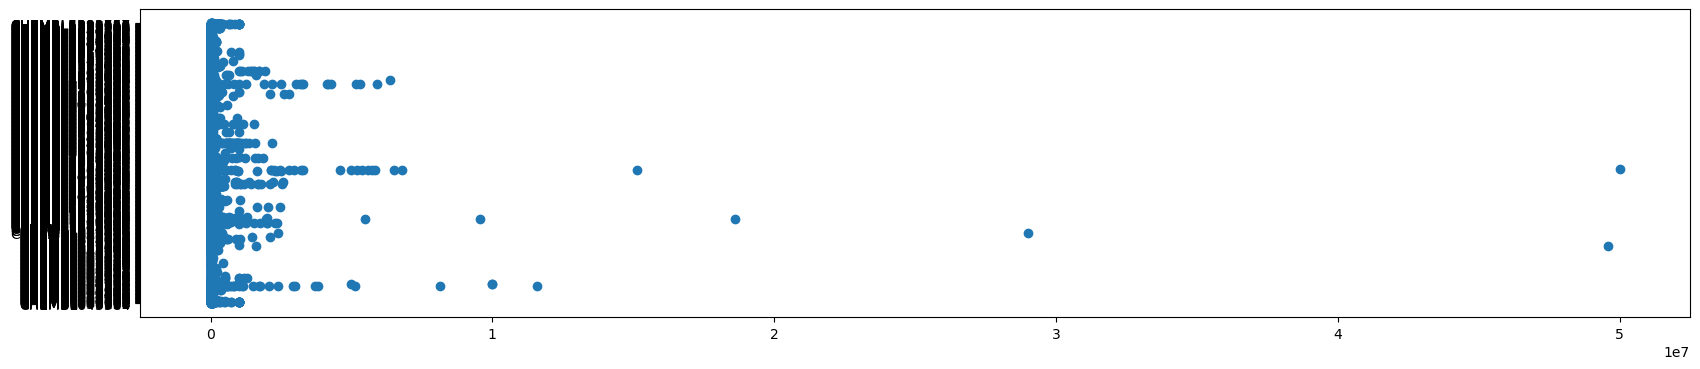

In [23]:
plt.figure(figsize=(20,4))
plt.scatter(df2["standard_value"],df2['assay_chembl_id'])

In [24]:
def pIC50(input):
    pIC50=[]
    for i in input["standard_value_norm"]:
        molar = i * (10** -9)
        pIC50.append(-np.log10(molar))
        
    input['pIC50']= pIC50
    x = input.drop('standard_value_norm',axis=1)
    
    return x

#this fuction is to normalise the values (even distribution)

In [25]:
df_combined.standard_value.describe()
#max value here we have as 4.9*10^7

count    6.642000e+03
mean     1.026835e+05
std      8.884597e+05
min      0.000000e+00
25%      1.592500e+02
50%      2.600000e+03
75%      1.713000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

since the values are big, we'll need to cap the values by a 100M (so that values dont exceed 100M)

In [26]:
def norm_value(input):
    
    norm=[]
    for i in input["standard_value"]:
        if i > 100000000:
            i=100000000
        norm.append(i)
        
    input["standard_value_norm"] = norm
    x =input.drop('standard_value', axis=1)
    
    return x

#this function is used to cap the values greater than 100m to 100m

In [27]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,46000.0
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,38310.0
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,1710.0
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,10000.0


In [28]:
df_norm.standard_value_norm.describe()
#now the vaules are

count    6.642000e+03
mean     1.026835e+05
std      8.884597e+05
min      0.000000e+00
25%      1.592500e+02
50%      2.600000e+03
75%      1.713000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [29]:
df4 = pIC50(df_norm)
df4

/var/folders/49/q7tf16b54hncs5jk8jk9kdcm0000gn/T/ipykernel_4507/4240095077.py:5: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,5.767004
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


In [30]:
df4.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,6642.000000,6642.000000,6642.000000,6642.000000,6642.000000
mean,419.933494,4.068949,1.152966,4.536284,inf
std,126.069857,2.368130,1.148025,2.010429,NaN
min,61.040000,-6.615100,0.000000,0.000000,1.304518
25%,337.372000,2.769000,0.000000,3.000000,4.766243
50%,404.929500,4.094650,1.000000,4.000000,5.585027
75%,490.239000,5.403775,2.000000,6.000000,6.797922
max,1235.463000,13.506800,13.000000,22.000000,inf


In [31]:
# removing intermidiate bioactivity from the data frame.

In [32]:
df_2class = df4[df4['class'] != "intermediate"]
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6636,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,243.262,1.8587,2.0,4.0,4.233810
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Bioactivity', ylabel='Frequency'>

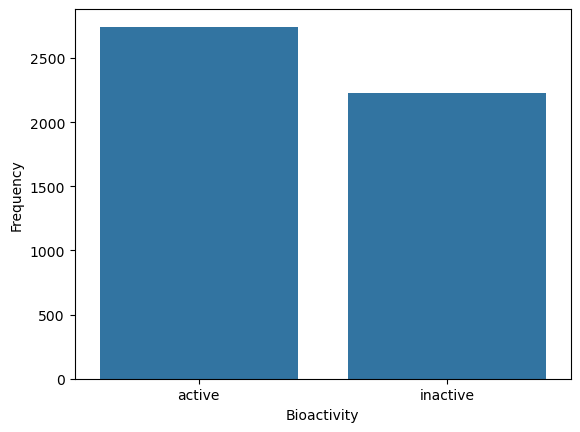

In [34]:
plt.figsize=(5,5)
plt.xlabel("Bioactivity")
plt.ylabel("Frequency")
sns.countplot(x='class',data = df_2class)

#plt.savefig("plot_bioactivity_class.pdf")

MW vs LogP PLOT

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/colors.py:1371: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


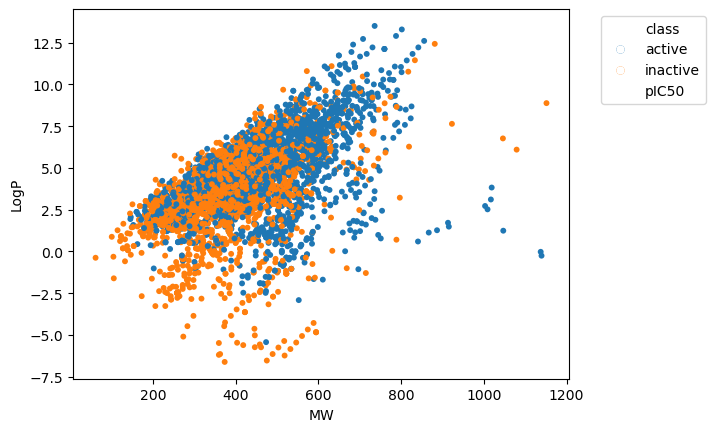

In [35]:
sns.scatterplot(x="MW",y='LogP',data=df_2class, hue="class", size="pIC50")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
#plt.savefig("plot_MWvsLogP.pdf")

<Axes: xlabel='class', ylabel='pIC50'>

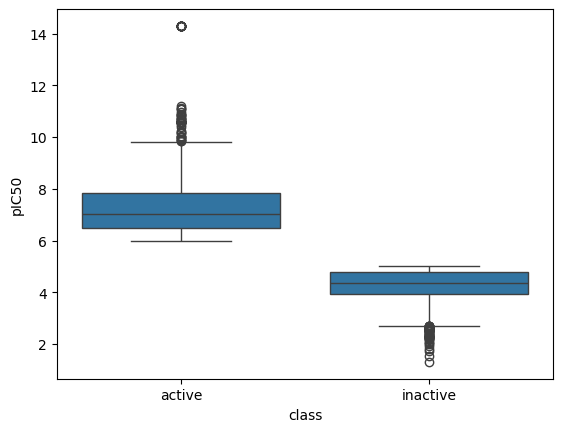

In [36]:
sns.boxplot(x='class',y='pIC50', data= df_2class)
#plt.savefig("plot_pIC50_vs_bioactivity.pdf")

doing a Statistical Analysis on the two classes

In [37]:
def mannwhitney(descriptor, verbrose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    seed(1)
    
    selection = [descriptor, 'class']
    df= df_2class[selection]
    active = df[df['class']== 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'class']
    df= df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    #conpare samples
    stat, p = mannwhitneyu(active, inactive)

    
    alpha = 0.05
    if p > alpha :
        interpretation = 'same distribution (fail to reject H0)'
    else:
        interpretation = 'different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor': descriptor, 'Statistics':stat, 'p':p, 'alpha':alpha, 'Interpretation':interpretation},index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

In [38]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6105400.0,0.0,0.05,different distribution (reject H0)


it was used to compare the sctive and inactive class to check if there was statistical significance for pIC50 variable 

<Axes: xlabel='class', ylabel='MW'>

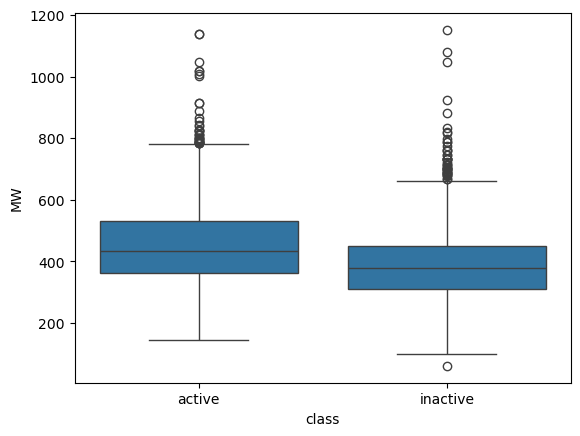

In [39]:
sns.boxplot(x='class',y='MW', data= df_2class)
#plt.savefig("plot_MW_vs_bioactivity.pdf")

<Axes: xlabel='class', ylabel='LogP'>

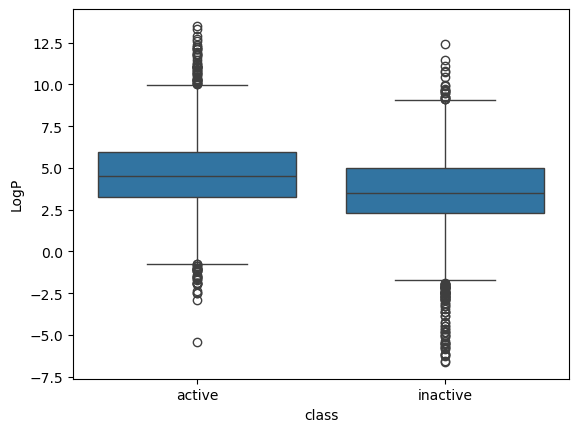

In [40]:
sns.boxplot(x='class',y='LogP', data= df_2class)
#plt.savefig("plot_LogP_vs_bioactivity.pdf")

<Axes: xlabel='class', ylabel='NumHDonors'>

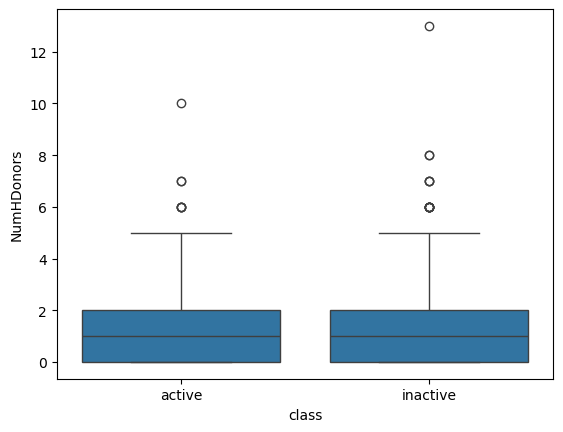

In [41]:
sns.boxplot(x='class',y='NumHDonors', data= df_2class)
#plt.savefig("plot_NumHDonors_vs_bioactivity.pdf")

<Axes: xlabel='class', ylabel='NumHAcceptors'>

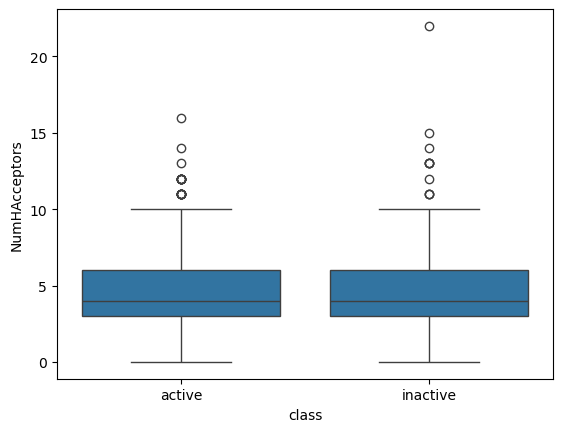

In [42]:
sns.boxplot(x='class',y='NumHAcceptors', data= df_2class)
#plt.savefig("plot_NumHAcceptors_vs_bioactivity.pdf")

In [43]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3947942.5,6.685289e-71,0.05,different distribution (reject H0)


In [44]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3883439.0,2.617954e-61,0.05,different distribution (reject H0)


In [45]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3463172.5,1.094916e-17,0.05,different distribution (reject H0)


In [46]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3296210.0,8.891019e-07,0.05,different distribution (reject H0)


All 4 of the lipinksi parameters show significant difference in acitves and inactives

In [47]:
#conda install conda-forge::padelpy

In [48]:
#we'll be using the df_final to continue ahead

In [49]:
df4.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'class', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')

In [50]:
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]
df4_selection.to_csv('molecule.smi',sep='\t',index =False,header=False)

In [51]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
cat: stdout: Broken pipe


In [52]:
! cat molecule.smi | wc -1

wc: illegal option -- 1
usage: wc [-Lclmw] [file ...]
cat: stdout: Broken pipe


In [53]:
import glob

In [54]:
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [55]:
#now we create a dictionary, that gives all this a shorter name


In [56]:
fp_list = ['AtomPairs2D',
 'AtomPairs2D',
 'EState',
 'Extended',
 'Fingerprinter',
 'GraphOnlyF',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'Pubchem',
 'SubstructureCount',
 'Substructure']

In [57]:
fp = dict(zip(fp_list,xml_files))

In [58]:
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'Extended': 'ExtendedFingerprinter.xml',
 'Fingerprinter': 'Fingerprinter.xml',
 'GraphOnlyF': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'Pubchem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [59]:
df4_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
6637,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,CHEMBL5398421
6638,N[C@@H](CO)C(=O)O,CHEMBL11298
6639,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,CHEMBL5395312
6640,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,CHEMBL5399112


In [60]:
df4

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,5.767004
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


In [61]:
fp["Pubchem"]
# this includes the information that the paddle discriptor software needs

'PubchemFingerprinter.xml'

In [76]:
from padelpy import padeldescriptor

fingerprint = "Pubchem"

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir = "molecule.smi", d_file = fingerprint_output_file, descriptortypes =fingerprint_descriptortypes,
               detectaromaticity = True, 
               standardizenitro = True,
               standardizetautomers = True,
               threads =2,
               removesalt = True,
               log =True,
               fingerprints =True)

In [77]:
df4_x = pd.read_csv("Pubchem.csv")

In [78]:
df4_x

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,CHEMBL5398421,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6638,CHEMBL11298,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6639,CHEMBL5395312,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6640,CHEMBL5399112,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df4_x = df4_x.drop(["Name"],axis=1)

In [80]:
df4_x.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df4_y = pd.DataFrame(df4[["pIC50"]])
df4_y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
6637,4.337242
6638,4.416688
6639,5.767004
6640,5.000000


In [82]:
df4_y.describe()

,pIC50
count,6642.000000
mean,inf
std,NaN
min,1.304518
25%,4.766243
50%,5.585027
75%,6.797922
max,inf


In [83]:
df5= pd.concat([df4_x,df4_y],axis=1)


In [84]:
df5.shape

(6642, 882)

In [85]:
df5 = df5.drop(df5[(df5.pIC50>6000)].index)

In [86]:
df5.shape


(6641, 882)

In [97]:
x = df5.drop(['pIC50'],axis=1)
x.shape

(6641, 881)

In [98]:
y=df5[["pIC50"]]
y.shape

(6641, 1)

In [99]:
# removing low variance features

In [100]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold =(0.8*(1-0.8)))
x = selection.fit_transform(x)

In [104]:
x.shape

(6641, 143)

In [107]:
pd.DataFrame(x).to_csv("descriptiors.csv",index=False)

In [108]:
x.shape

(6641, 143)

In [79]:
# reduced from 881 features to 143 features

In [80]:
from sklearn.model_selection import train_test_split


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

NameError: name 'train_test_split' is not defined

In [82]:
x_train.shape, y_train.shape

((5312, 143), (5312, 1))

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
model = RandomForestRegressor(n_estimators=100)

In [110]:
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [86]:
model.score(x_test,y_test)

0.7114413541129103

In [100]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [101]:
clf =LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

In [102]:
test,train=clf.fit(x_train, x_test, y_train, y_test)

 98%|█████████████████████████████████████████▉ | 41/42 [01:02<00:00,  1.01it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 5312, number of used features: 143
[LightGBM] [Info] Start training from score 5.792864


100%|███████████████████████████████████████████| 42/42 [01:02<00:00,  1.49s/it]


In [103]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.68,0.72,0.83,5.62
XGBRegressor,0.67,0.70,0.85,0.49
BaggingRegressor,0.64,0.68,0.88,0.59
KNeighborsRegressor,0.61,0.65,0.92,0.29
LGBMRegressor,0.60,0.65,0.93,0.48
HistGradientBoostingRegressor,0.60,0.64,0.93,2.04
MLPRegressor,0.58,0.63,0.95,10.45
SVR,0.53,0.58,1.01,4.20
NuSVR,0.53,0.58,1.01,3.20


In [104]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.68,0.72,0.83,5.62
XGBRegressor,0.67,0.70,0.85,0.49
BaggingRegressor,0.64,0.68,0.88,0.59
KNeighborsRegressor,0.61,0.65,0.92,0.29
LGBMRegressor,0.60,0.65,0.93,0.48
HistGradientBoostingRegressor,0.60,0.64,0.93,2.04
MLPRegressor,0.58,0.63,0.95,10.45
SVR,0.53,0.58,1.01,4.20
NuSVR,0.53,0.58,1.01,3.20


In [105]:
import matplotlib.pyplot as plt
import seaborn as snb

[(0.0, 1.0)]

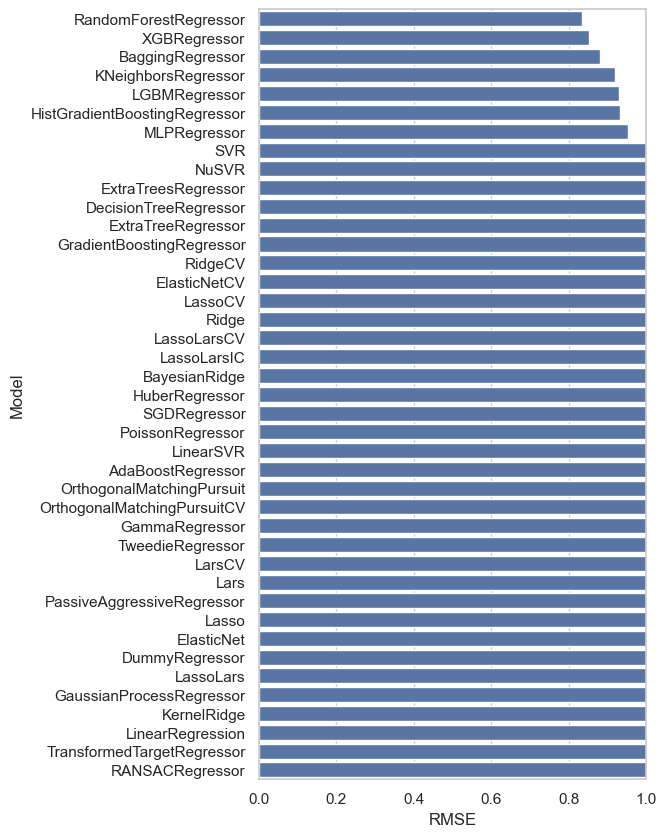

In [110]:
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
plot = sns.barplot(y=train.index, x="RMSE",data=train)
plot.set(xlim=(0,1))

[(0.0, 1.0)]

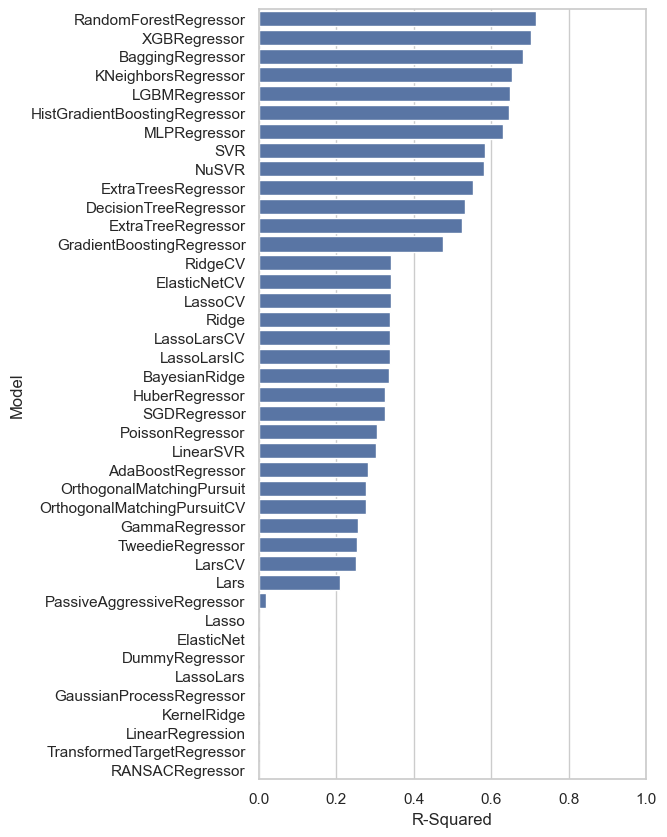

In [111]:
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
plot = sns.barplot(y=train.index, x="R-Squared",data=train)
plot.set(xlim=(0,1))

[(0.0, 1.0)]

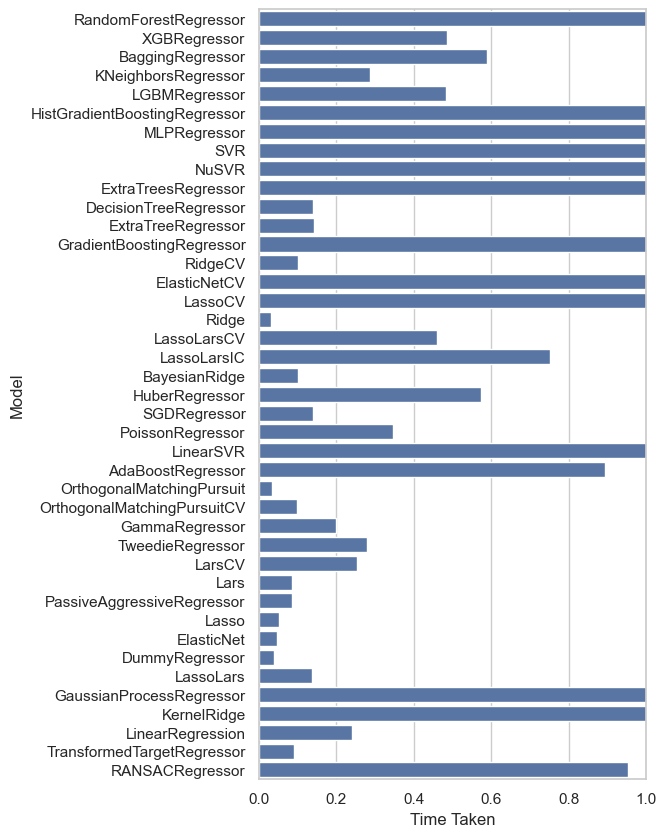

In [112]:
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
plot = sns.barplot(y=train.index, x="Time Taken",data=train)
plot.set(xlim=(0,1))

In [90]:
# we'll use random forest regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
model = RandomForestRegressor()
model.fit(x,y)

/var/folders/49/q7tf16b54hncs5jk8jk9kdcm0000gn/T/ipykernel_4507/3149538591.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


RandomForestRegressor()

In [114]:
x.shape

(6641, 143)

In [115]:
y.shape

(6641, 1)

In [117]:
y_pred=model.predict(x)

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predictedvalues')

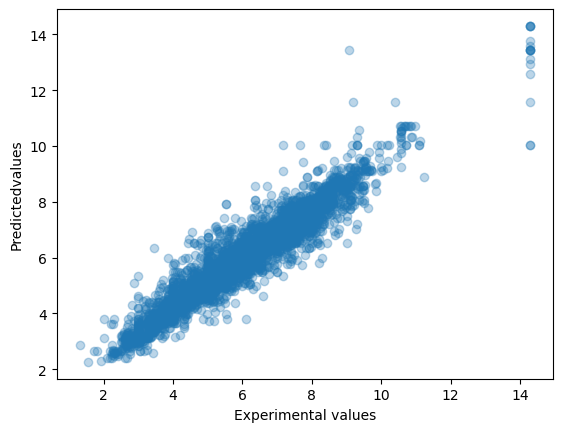

In [126]:
plot=plt.scatter(x=y, y=y_pred, alpha=0.3)
plt.xlabel("Experimental values")
plt.ylabel("Predictedvalues")

In [127]:
import pickle


In [128]:
pickle.dump(model,open('Acetylcholinesterase_model.pkl', 'wb'))